In [22]:
# Import Lirbrary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
MAIN_PATH = 'C:\\Users\\Namkang Tantikorn\\Downloads\\Homework\\Machine Lerning\\Applied ML at NIDA\\' # Data Set Location
df_train = pd.read_csv(MAIN_PATH + 'train-dataset.csv')
df_test = pd.read_csv(MAIN_PATH + 'test-dataset.csv')

In [24]:
def data_prepare(df, col):
    data = df.drop(columns = col)
    outcome = df['target']
    return data, outcome

In [25]:
def data_unbias(df, col):
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.over_sampling  import RandomOverSampler
    from imblearn.over_sampling  import SMOTE
    from sklearn.model_selection import train_test_split

    data, outcome = data_prepare(df,col)
    
    X_train, X_test, y_train, y_test = train_test_split(data, outcome, test_size=(0.2), random_state=365)

    rus = RandomUnderSampler(random_state=0)
    rus.fit(X_train, y_train)
    X_undersampled, y_undersampled = rus.fit_sample(X_train, y_train)
    df_undersampled = pd.concat([pd.DataFrame(data=X_undersampled),pd.DataFrame(data=y_undersampled)], axis=1, sort=False)

    ros = RandomOverSampler(random_state=0)
    ros.fit(X_train, y_train)
    X_oversampled, y_oversampled = ros.fit_sample(X_train, y_train)
    df_oversampled = pd.concat([pd.DataFrame(data=X_oversampled),pd.DataFrame(data=y_oversampled)], axis=1, sort=False)

    sm = SMOTE(random_state=0)
    sm.fit(X_train, y_train)
    X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)
    df_smote = pd.concat([pd.DataFrame(data=X_SMOTE),pd.DataFrame(data=y_SMOTE)], axis=1, sort=False)
    
    return df_undersampled, df_oversampled, df_smote

In [26]:
def get_all_models(data, outcome):
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix, accuracy_score
    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.naive_bayes import GaussianNB
    from xgboost import XGBClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    
    
    X_train, X_test, y_train, y_test = train_test_split(data, outcome, test_size=(0.2), random_state=365)
    k_fold = KFold(n_splits=10, shuffle=True, random_state=365)

    #Logistic
    logmodel = LogisticRegression(max_iter=10000, C=0.05) 
    logmodel.fit(X_train,y_train)
    logpred = logmodel.predict(X_test)
    LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

    #KNN
    knn = KNeighborsClassifier(n_neighbors=22)
    knn.fit(X_train, y_train)
    knnpred = knn.predict(X_test)
    KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

    #SVC
    svc= SVC(kernel = 'sigmoid')
    svc.fit(X_train, y_train)
    svcpred = svc.predict(X_test)
    SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

    #Decision Tree
    dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
    dtree.fit(X_train, y_train)
    dtreepred = dtree.predict(X_test)
    DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

    #Random Forest
    rfc = RandomForestClassifier(n_estimators = 2000)#criterion = entopy,gini
    rfc.fit(X_train, y_train)
    rfcpred = rfc.predict(X_test)
    RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

    #Naive Bayes
    gaussiannb= GaussianNB()
    gaussiannb.fit(X_train, y_train)
    gaussiannbpred = gaussiannb.predict(X_test)
    probs = gaussiannb.predict(X_test)
    GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

    #XGBoost
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    xgbprd = xgb.predict(X_test)
    XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

    #Gradient Boosting
    gbk = GradientBoostingClassifier()
    gbk.fit(X_train, y_train)
    gbkpred = gbk.predict(X_test)
    GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
    
    ml_score = (RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV)
    ml_model = (rfc, dtree, svc, knn, logmodel, gaussiannb, xgb, gbk)

    return ml_score, ml_model

In [48]:
def output(df, col, ml, mln):
    
    data_test = df.drop(columns = col)

    predict_test = ml.predict_proba(data_test)
    predict_test = pd.DataFrame(predict_test)
    predict_test.index.name = 'id'
    predict_test.index += 1
    predict_test[1].to_csv(str(mln)+'.csv', header = ['target'])

    predict_test = ml.predict_proba(data_test)
    predict_test = pd.DataFrame(predict_test)
    predict_test.index.name = 'id'
    predict_test.index += 1
    predict_test[1].to_csv(str(mln)+'_us.csv', header = ['target'])

    predict_test = ml.predict_proba(data_test)
    predict_test = pd.DataFrame(predict_test)
    predict_test.index.name = 'id'
    predict_test.index += 1
    predict_test[1].to_csv(str(mln)+'_os.csv', header = ['target'])

    predict_test = ml.predict_proba(data_test)
    predict_test = pd.DataFrame(predict_test)
    predict_test.index.name = 'id'
    predict_test.index += 1
    predict_test[1].to_csv(str(mln)+'_sm.csv', header = ['target'])
    return

In [28]:
df_undersampled, df_oversampled, df_smote = data_unbias(df_train,['target'])

In [29]:
# Prepare Data for ML models
data, outcome = data_prepare(df_train,['target'])

# Get all model results
ml_score, ml_model = get_all_models(data, outcome)

# Assign model performance
RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV = ml_score    
rfc, dtree, svc, knn, logmodel, gaussiannb, xgb, gbk = ml_model

# Ranking model performance
models = pd.DataFrame({
            'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                       'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
            'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,0.835294
4,Logistic Model,0.823162
5,Gausian NB,0.799632
6,XGBoost,0.793015
7,Gradient Boosting,0.775735
1,Decision Tree Classifier,0.752941
3,K-Near Neighbors,0.580882
2,Support Vector Machine,0.568750


In [30]:
# Prepare Data for ML models
data, outcome = data_prepare(df_undersampled,['target'])

# Get all model results
ml_score, ml_model = get_all_models(data, outcome)

# Assign model performance
RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV = ml_score    
rfc_os, dtree_os, svc_os, knn_os, logmodel_os, gaussiannb_os, xgb_os, gbk_os = ml_model

# Ranking model performance
models = pd.DataFrame({
            'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                       'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
            'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,0.817424
7,Gradient Boosting,0.810606
6,XGBoost,0.803788
5,Gausian NB,0.801515
1,Decision Tree Classifier,0.768182
4,Logistic Model,0.738636
3,K-Near Neighbors,0.646970
2,Support Vector Machine,0.430303


In [31]:
# Prepare Data for ML models
data, outcome = data_prepare(df_oversampled,['target'])

# Get all model results
ml_score, ml_model = get_all_models(data, outcome)

# Assign model performance
RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV = ml_score    
rfc_os, dtree_os, svc_os, knn_os, logmodel_os, gaussiannb_os, xgb_os, gbk_os = ml_model

# Ranking model performance
models = pd.DataFrame({
            'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                       'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
            'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,0.865000
1,Decision Tree Classifier,0.837500
5,Gausian NB,0.818333
6,XGBoost,0.808750
7,Gradient Boosting,0.805833
4,Logistic Model,0.798333
3,K-Near Neighbors,0.594167
2,Support Vector Machine,0.379167


In [32]:
# Prepare Data for ML models
data, outcome = data_prepare(df_smote,['target'])

# Get all model results
ml_score, ml_model = get_all_models(data, outcome)

# Assign model performance
RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV = ml_score    
rfc_os, dtree_os, svc_os, knn_os, logmodel_os, gaussiannb_os, xgb_os, gbk_os = ml_model

# Ranking model performance
models = pd.DataFrame({
            'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                       'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
            'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,0.857083
5,Gausian NB,0.830833
7,Gradient Boosting,0.797917
6,XGBoost,0.795417
4,Logistic Model,0.778333
1,Decision Tree Classifier,0.706667
3,K-Near Neighbors,0.579583
2,Support Vector Machine,0.379167


In [33]:
ml  = rfc
mlz = 'rfc'

output(ml,mlz)

### **Model Evaluation**

In [34]:
X = df_train.iloc[:,0:13]  #independent columns
y = df_train.iloc[:,-1]    #target column i.e price range

In [35]:
#apply SelectKBest class to extract top 10 best features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Specs       Score
7    thalach  110.748125
9    oldpeak   48.671593
11        ca   43.866735
2         cp   38.304876
8      exang   30.023574
4       chol   20.990013
0        age   12.325609
3   trestbps    9.099552
10     slope    6.345906
12      thal    5.681513


[0.06520697 0.05289339 0.11420647 0.06187606 0.055836   0.02197411
 0.03825462 0.07939675 0.1098338  0.09792061 0.05847514 0.13111578
 0.11301029]


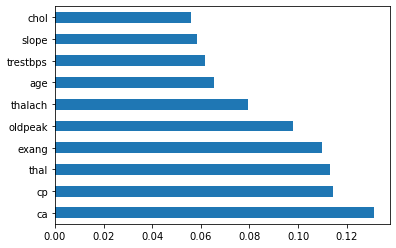

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

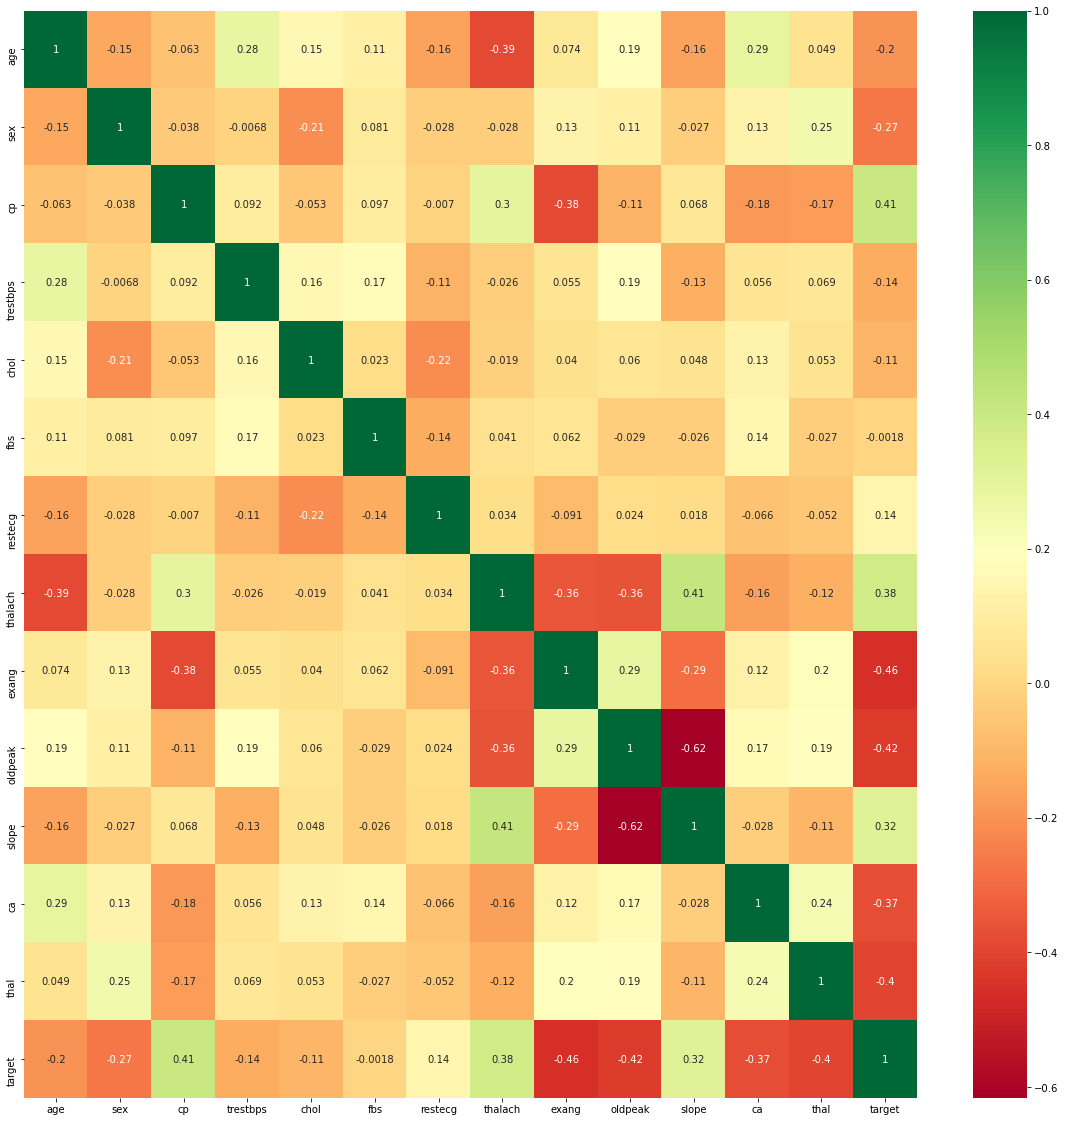

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns

#get correlations of each features in dataset
corrmat = df_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [54]:
col = ['fbs','chol','target']

In [55]:
# Prepare Data for ML models
data, outcome = data_prepare(df_train, col)

# Get all model results
ml_score, ml_model = get_all_models(data, outcome)

# Assign model performance
RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV = ml_score    
rfc, dtree, svc, knn, logmodel, gaussiannb, xgb, gbk = ml_model

# Ranking model performance
models = pd.DataFrame({
            'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                       'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
            'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,0.834926
4,Logistic Model,0.816912
6,XGBoost,0.816912
7,Gradient Boosting,0.799265
5,Gausian NB,0.781985
1,Decision Tree Classifier,0.763971
3,K-Near Neighbors,0.633456
2,Support Vector Machine,0.568750


In [56]:
# Prepare Data for ML models
data, outcome = data_prepare(df_undersampled, col)

# Get all model results
ml_score, ml_model = get_all_models(data, outcome)
 
# Assign model performance
RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV = ml_score    
rfc_us, dtree_us, svc_us, knn_us, logmodel_us, gaussiannb_us, xgb_us, gbk_us = ml_model

# Ranking model performance
models = pd.DataFrame({
            'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                       'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
            'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
6,XGBoost,0.829545
7,Gradient Boosting,0.810606
5,Gausian NB,0.809848
0,Random Forest Classifier,0.799242
1,Decision Tree Classifier,0.765909
4,Logistic Model,0.730303
3,K-Near Neighbors,0.678788
2,Support Vector Machine,0.405303


In [57]:
# Prepare Data for ML models
data, outcome = data_prepare(df_oversampled,col)

# Get all model results
ml_score, ml_model = get_all_models(data, outcome)

# Assign model performance
RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV = ml_score    
rfc_os, dtree_os, svc_os, knn_os, logmodel_os, gaussiannb_os, xgb_os, gbk_os = ml_model

# Ranking model performance
models = pd.DataFrame({
            'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                       'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
            'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,0.839167
6,XGBoost,0.835000
5,Gausian NB,0.825000
7,Gradient Boosting,0.825000
1,Decision Tree Classifier,0.798750
4,Logistic Model,0.797917
3,K-Near Neighbors,0.640417
2,Support Vector Machine,0.379167


In [58]:
# Prepare Data for ML models
data, outcome = data_prepare(df_smote,col)

# Get all model results
ml_score, ml_model = get_all_models(data, outcome)

# Assign model performance
RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV = ml_score    
rfc_os, dtree_os, svc_os, knn_os, logmodel_os, gaussiannb_os, xgb_os, gbk_os = ml_model

# Ranking model performance
models = pd.DataFrame({
            'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                       'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
            'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,0.837917
5,Gausian NB,0.831250
6,XGBoost,0.808750
7,Gradient Boosting,0.791667
4,Logistic Model,0.778333
1,Decision Tree Classifier,0.732500
3,K-Near Neighbors,0.659583
2,Support Vector Machine,0.379167


In [59]:
ml  = logmodel
mln = 'logmodel'

output(df_test,['fbs', 'chol'], ml,mln)